## Load Libraries

In [1]:
from pathlib import Path    # platform independent paths
from IPython.display import Markdown, display
import pandas as pd
from nltk.probability import FreqDist    # frequency dictionary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# set figure size
plt.rcParams['figure.figsize'] = [20, 10]

## User-defined Functions

In [3]:
def printmd(string, color=None):
    ''' NOT MINE
    Markdown printing from a code cell
    Ex. printmd("**bold and blue**", color="blue")
    https://stackoverflow.com/questions/23271575/printing-bold-colored-etc-text-in-ipython-qtconsole
    '''
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

In [4]:
def freq_dist(some_list, min_freq = 1, exact_freq = 1, top = 0):
    '''
    Adding in fucntionality to FreqDist
    Need to add in raise errors if more than one optional argument used.
    '''
    temp = FreqDist(some_list)
    if (min_freq != 1):
        temp = [(k, v) for k, v in temp.items() if v > min_freq]
        temp.sort(key=lambda x: x[1], reverse = True)
        return temp
    elif (exact_freq != 1):
        temp = [(k, v) for k, v in temp.items() if v == exact_freq]
        return temp
    elif (top != 0):
        return temp.most_common(top)
    else:
        temp = [(k, v) for k, v in temp.items()]
        temp.sort(key=lambda x: x[1], reverse = True)
        return temp

## Load Files

In [5]:
# File locations
file_neg = Path('../input/comments_negative.csv')
file_pos = Path('../input/comments_positive.csv')

In [6]:
# Load into dataframes
df_neg = pd.read_csv(file_neg)
df_pos = pd.read_csv(file_pos)

In [7]:
#df_neg = df_neg.sample(n=100000, random_state=1)
#df_pos = df_pos.sample(n=100000, random_state=1)

In [8]:
df_neg.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c0a2d2p,t1_c0a2cn1,t5_1a8ah,t3_8pr4w,"Na, not really. \n\nI just hate islam and ever...",-2946,-2946,b34nz,0,t3_8pr4w,What goes through the heads of you people? Is...,459,459,[deleted],0
1,c6okok8,t1_c6oaywb,t5_2s8e9,t3_11otij,lol you're some ugly ass white dude,-2724,-2724,letmetellyouhowitis,0,t3_11otij,This is worth noting.\n\nThankfully I don't.,72,72,flowen65,0
2,c3nlalf,t1_c3nijr7,t5_2qzb6,t3_p9a1v,"First of off, its not true, and second off, I ...",-2132,-2132,iamwoodyharrelson,0,t3_p9a1v,I swear this is *(allegedly)* a true story. I...,4028,4028,AndyRooney,0
3,c10nh8q,t1_c10nc34,t5_6,t3_djasj,Who made you reddit police? I will submit what...,-2117,-2117,JimmyJamesincorp,0,t3_djasj,I was on my way over here to bitch and moan ab...,1214,1214,SloaneRanger,0
4,c3nlufk,t1_c3nlcob,t5_2qzb6,t3_p9a1v,We gotta be...i consider my time valuable.,-1962,-1962,iamwoodyharrelson,0,t3_p9a1v,Should change this AMA to AMAAR (Ask Me Anythi...,1405,1405,bersh,0


In [9]:
df_pos.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0


Combine positive and negative comment data sets and exclude those without text or parent text fields

In [10]:
totalDF = pd.concat([df_pos,df_neg])

In [11]:
totalDF = totalDF[totalDF['text'].notnull()]
totalDF = totalDF[totalDF['parent_text'].notnull()]

In [12]:
df_pos = 5
df_neg = 5

Bin scores to give < -1000, < -100, -100 < 100, >100, >1000 as our labels

In [13]:
conditions = [
    (totalDF['score'] < -1000) ,
    (totalDF['score'] > -1000) & (totalDF['score'] < -100),
    (totalDF['score'] > -100) & (totalDF['score'] < 100),
    (totalDF['score'] > 100) & (totalDF['score'] < 1000),
    (totalDF['score'] > 1000)]
choices = [-2, -1, 0,1,2]
totalDF['category'] = np.select(conditions, choices, default=0)

Split dataset in half to allow test and training, due to using transfer learning from BERT interesting to assess whether training/fine tuning bert on a small subset of the data is effective

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(totalDF, totalDF["category"], test_size=0.5)

install bert libraries

In [15]:


!pip install bert



  Created wheel for bert: filename=bert-2.2.0-cp36-none-any.whl size=3755 sha256=683c78f2caa92810242604d0eaf04e920ec053432b4a072b720d3401d372195e
  Stored in directory: /tmp/.cache/pip/wheels/fe/71/b7/941459453bd38e5d97a8c886361dee19325e9933c9cf88ad46
  Created wheel for erlastic: filename=erlastic-2.0.0-cp36-none-any.whl size=6789 sha256=8b726ca8a350ba3f1e02ec5d166fcac3a890764c4422eb73705c8b0054c116ed
  Stored in directory: /tmp/.cache/pip/wheels/02/62/46/93c713a5f061aeeb4f16eb6bf5ee798816e6ddda70faa78e69
Successfully built bert erlastic


In [16]:
!pip install bert-tensorflow

     |████████████████████████████████| 71kB 2.8MB/s 


In [17]:
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import os
import re
import numpy as np
from bert.tokenization import FullTokenizer
from tqdm import tqdm_notebook
from tensorflow.keras import backend as K


In [18]:
# Initialize session
sess = tf.Session()

# Params for bert model and tokenization
bert_path = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

sample training data to a smaller subset of 100k reddit posts to allow quicker fitting

In [19]:
X_train =  X_train.sample(n=500000, random_state=1)
#X_train =  X_train.sample(n=100000, random_state=1)

In [20]:
X_train.head

<bound method NDFrame.head of               id   parent_id subreddit_id    link_id  \
659856   c1wdza6  t1_c1wdmaf     t5_2qh0u   t3_hlni7   
1452960  co8401v  t1_co81w7v     t5_2qt55  t3_2uez6o   
1082665  c1mqnbl  t1_c1mqffr     t5_2qh1i   t3_gd6fq   
1880202  c67ltdn  t1_c67llif     t5_2qhwp   t3_ztltg   
1595864  c11pmxe  t1_c11pjie         t5_6   t3_doe17   
518495   cnx8c62  t1_cnx6ge1     t5_2qh1i  t3_2ta2t2   
1813614  cpf40xj  t1_cpezlcb     t5_2va9w  t3_2z1gc4   
853719   c07hgba  t1_c07hfii     t5_2qh0s   t3_7v013   
1340875  co8je8w  t1_co8fy43     t5_2qh1i  t3_2ug029   
1813894  c6j2dxy  t1_c6j2b0o     t5_2qh03  t3_113193   
806676   c695hup  t1_c695gec     t5_2qh33   t3_zz46f   
1917869  c47hfx4  t1_c47gdkj     t5_2rjz2   t3_roo4f   
1912055  c4ogdck  t1_c4ofkfu     t5_2qh1i   t3_to521   
656368   c4af2km  t1_c4aevcq     t5_2qh1e   t3_s16lc   
930642   c5a8dzt  t1_c5a7qif     t5_2qhx4   t3_w4k0r   
1928782  c5mm3mf  t1_c5mlmkw     t5_2qhx4   t3_xidok   
997404   c420gkq  

In [21]:
#max_seq_length = 32
max_seq_length = 18

# Create datasets (Only take up to max_seq_length words for memory)
train_text = X_train['text'].tolist()
train_text = [' '.join(t.split()[0:max_seq_length]) for t in train_text]
train_text = np.array(train_text, dtype=object)[:, np.newaxis]


#train_label = totalDF['score'].tolist()
train_label = X_train['category'].tolist()

train2_text = X_train['parent_text'].tolist()
train2_text = [' '.join(t.split()[0:max_seq_length]) for t in train2_text]
train2_text = np.array(train2_text, dtype=object)[:, np.newaxis]

test_text = X_test['text'].tolist()
test_text = [' '.join(t.split()[0:max_seq_length]) for t in test_text]
test_text = np.array(test_text, dtype=object)[:, np.newaxis]

test2_text = X_test['parent_text'].tolist()
test2_text = [' '.join(t.split()[0:max_seq_length]) for t in test2_text]
test2_text = np.array(test2_text, dtype=object)[:, np.newaxis]

test_label =  X_test['category'].tolist()

Check what label bins are represented in the test and train data (sometimes doesn't capture any -2 scores (<-1000)

In [22]:
np.unique(train_label)

array([-2, -1,  0,  1,  2])

In [23]:
np.unique(test_label)

array([-2, -1,  0,  1,  2])

In [24]:
# train_label = totalDF[.tolist()
# train_text = totalDF['text'].tolist()

This is a modified version of Jacob Zweig's code for using bert with tensorflow https://towardsdatascience.com/bert-in-keras-with-tensorflow-hub-76bcbc9417b.

Modifications have been made to add parent_text and the text of the reddit post itself as inputs rather than just one text feature.

In [25]:
class PaddingInputExample(object):
    """Fake example so the num input examples is a multiple of the batch size.
  When running eval/predict on the TPU, we need to pad the number of examples
  to be a multiple of the batch size, because the TPU requires a fixed batch
  size. The alternative is to drop the last batch, which is bad because it means
  the entire output data won't be generated.
  We use this class instead of `None` because treating `None` as padding
  battches could cause silent errors.
  """

class InputExample(object):
    """A single training/test example for simple sequence classification."""

    def __init__(self, guid, text_a, text_b=None, label=None):
        """Constructs a InputExample.
    Args:
      guid: Unique id for the example.
      text_a: string. The untokenized text of the first sequence. For single
        sequence tasks, only this sequence must be specified.
      text_b: (Optional) string. The untokenized text of the second sequence.
        Only must be specified for sequence pair tasks.
      label: (Optional) string. The label of the example. This should be
        specified for train and dev examples, but not for test examples.
    """
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

def create_tokenizer_from_hub_module():
    """Get the vocab file and casing info from the Hub module."""
    bert_module =  hub.Module(bert_path)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    vocab_file, do_lower_case = sess.run(
        [
            tokenization_info["vocab_file"],
            tokenization_info["do_lower_case"],
        ]
    )

    return FullTokenizer(vocab_file=vocab_file, do_lower_case=do_lower_case)

def convert_single_example(tokenizer, example, max_seq_length=256):
    """Converts a single `InputExample` into a single `InputFeatures`."""

    if isinstance(example, PaddingInputExample):
        input_ids = [0] * max_seq_length
        input_mask = [0] * max_seq_length
        segment_ids = [0] * max_seq_length
        label = 0
        return input_ids, input_mask, segment_ids, label

    tokens_a = tokenizer.tokenize(example.text_a)
    if len(tokens_a) > max_seq_length - 2:
        tokens_a = tokens_a[0 : (max_seq_length - 2)]

    tokens = []
    segment_ids = []
    tokens.append("[CLS]")
    segment_ids.append(0)
    for token in tokens_a:
        tokens.append(token)
        segment_ids.append(0)
    tokens.append("[SEP]")
    segment_ids.append(0)

    input_ids = tokenizer.convert_tokens_to_ids(tokens)

    # The mask has 1 for real tokens and 0 for padding tokens. Only real
    # tokens are attended to.
    input_mask = [1] * len(input_ids)

    # Zero-pad up to the sequence length.
    while len(input_ids) < max_seq_length:
        input_ids.append(0)
        input_mask.append(0)
        segment_ids.append(0)

    assert len(input_ids) == max_seq_length
    assert len(input_mask) == max_seq_length
    assert len(segment_ids) == max_seq_length

    return input_ids, input_mask, segment_ids, example.label

def convert_examples_to_features(tokenizer, examples, max_seq_length=256):
    """Convert a set of `InputExample`s to a list of `InputFeatures`."""

    input_ids, input_masks, segment_ids, labels = [], [], [], []
    for example in tqdm_notebook(examples, desc="Converting examples to features"):
        input_id, input_mask, segment_id, label = convert_single_example(
            tokenizer, example, max_seq_length
        )
        input_ids.append(input_id)
        input_masks.append(input_mask)
        segment_ids.append(segment_id)
        labels.append(label)
    return (
        np.array(input_ids),
        np.array(input_masks),
        np.array(segment_ids),
        np.array(labels).reshape(-1, 1),
    )

def convert_text_to_examples(texts, labels):
    """Create InputExamples"""
    InputExamples = []
    for text, label in zip(texts, labels):
        InputExamples.append(
            InputExample(guid=None, text_a=" ".join(text), text_b=None, label=label)
        )
    return InputExamples

# Instantiate tokenizer
tokenizer = create_tokenizer_from_hub_module()

# Convert data to InputExample format
train_examples = convert_text_to_examples(train_text, train_label)
train2_examples = convert_text_to_examples(train2_text, train_label)
test_examples = convert_text_to_examples(test_text, test_label)
test2_examples = convert_text_to_examples(test2_text, test_label)

# Convert to features
(train_input_ids, train_input_masks, train_segment_ids, train_labels 
) = convert_examples_to_features(tokenizer, train_examples, max_seq_length=max_seq_length)

(train2_input_ids, train2_input_masks, train2_segment_ids, train_labels 
) = convert_examples_to_features(tokenizer, train2_examples, max_seq_length=max_seq_length)



We now have  tokenized masks and segment ids for bert layer to use

In [26]:
train_label[4]

0

one hot encode training labels to use with 5 wide NN output layer

In [27]:
import sklearn
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit([-2,-1,0,1,2])
train_label_bak = train_labels
train_labels = label_binarizer.transform(train_labels)
#test_labels = label_binarizer.transform(test_labels)

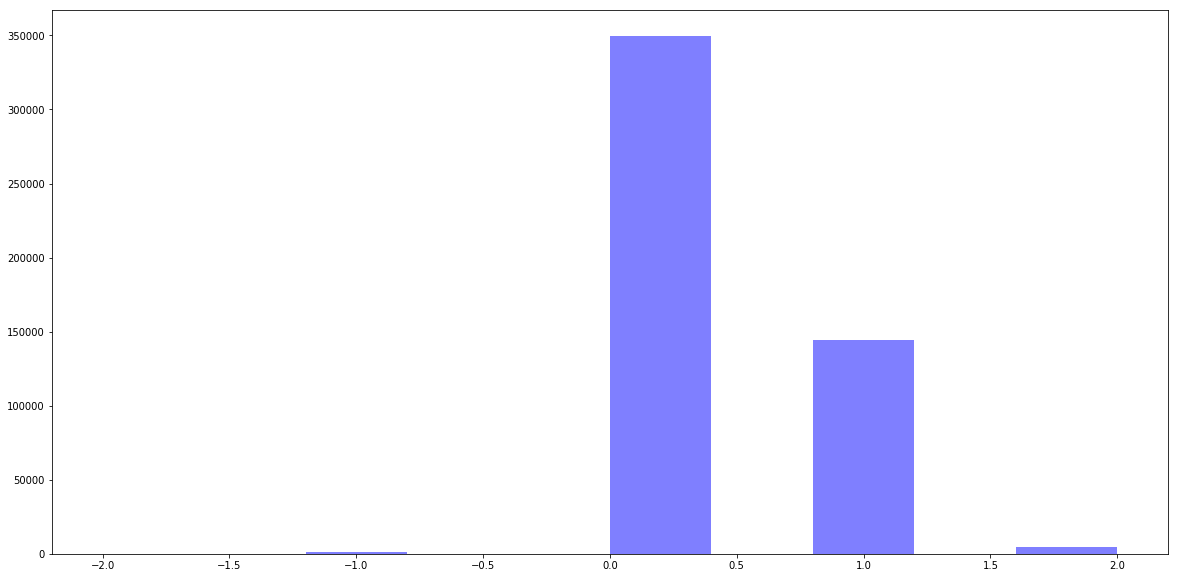

In [28]:
plt.hist(train_label_bak,10, facecolor='blue', alpha=0.5)
plt.show()

In [29]:
train_labels[1]

array([0, 0, 1, 0, 0])

In [30]:
#train_labels = pd.get_dummies(train_labels)

Create NN model using Bert once again this was taken from Jacob Zweig's notebook

In [31]:
class BertLayer(tf.keras.layers.Layer):
    def __init__(
        self,
        n_fine_tune_layers=10,
        pooling="first",
        bert_path="https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1",
        **kwargs,
    ):
        self.n_fine_tune_layers = n_fine_tune_layers
        self.trainable = True
        self.output_size = 768
        self.pooling = pooling
        self.bert_path = bert_path
        if self.pooling not in ["first", "mean"]:
            raise NameError(
                f"Undefined pooling type (must be either first or mean, but is {self.pooling}"
            )

        super(BertLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.bert = hub.Module(
            self.bert_path, trainable=self.trainable, name=f"{self.name}_module"
        )

        # Remove unused layers
        trainable_vars = self.bert.variables
        if self.pooling == "first":
            trainable_vars = [var for var in trainable_vars if not "/cls/" in var.name]
            trainable_layers = ["pooler/dense"]

        elif self.pooling == "mean":
            trainable_vars = [
                var
                for var in trainable_vars
                if not "/cls/" in var.name and not "/pooler/" in var.name
            ]
            trainable_layers = []
        else:
            raise NameError(
                f"Undefined pooling type (must be either first or mean, but is {self.pooling}"
            )

        # Select how many layers to fine tune
        for i in range(self.n_fine_tune_layers):
            trainable_layers.append(f"encoder/layer_{str(11 - i)}")

        # Update trainable vars to contain only the specified layers
        trainable_vars = [
            var
            for var in trainable_vars
            if any([l in var.name for l in trainable_layers])
        ]

        # Add to trainable weights
        for var in trainable_vars:
            self._trainable_weights.append(var)

        for var in self.bert.variables:
            if var not in self._trainable_weights:
                self._non_trainable_weights.append(var)

        super(BertLayer, self).build(input_shape)

    def call(self, inputs):
        inputs = [K.cast(x, dtype="int32") for x in inputs]
        input_ids, input_mask, segment_ids = inputs
        bert_inputs = dict(
            input_ids=input_ids, input_mask=input_mask, segment_ids=segment_ids
        )
        if self.pooling == "first":
            pooled = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
                "pooled_output"
            ]
        elif self.pooling == "mean":
            result = self.bert(inputs=bert_inputs, signature="tokens", as_dict=True)[
                "sequence_output"
            ]

            mul_mask = lambda x, m: x * tf.expand_dims(m, axis=-1)
            masked_reduce_mean = lambda x, m: tf.reduce_sum(mul_mask(x, m), axis=1) / (
                    tf.reduce_sum(m, axis=1, keepdims=True) + 1e-10)
            input_mask = tf.cast(input_mask, tf.float32)
            pooled = masked_reduce_mean(result, input_mask)
        else:
            raise NameError(f"Undefined pooling type (must be either first or mean, but is {self.pooling}")

        return pooled

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_size)

In [32]:
# define metrics to measure during runtime of keras
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
# Build model
def build_model(max_seq_length): 
    # add width to acommodate combined parent_text and text features
    in_id = tf.keras.layers.Input(shape=(max_seq_length*2,), name="input_ids")
    in_mask = tf.keras.layers.Input(shape=(max_seq_length*2,), name="input_masks")
    in_segment = tf.keras.layers.Input(shape=(max_seq_length*2,), name="segment_ids")
    bert_inputs = [in_id, in_mask, in_segment]
    
    bert_output = BertLayer(n_fine_tune_layers=3, pooling="first")(bert_inputs)
    #dense = tf.keras.layers.Dense(256, activation='relu')(bert_output)
    dense = tf.keras.layers.Dense(42, activation='relu')(bert_output)
    #pred = tf.keras.layers.Dense(1, activation='sigmoid')(dense)
    pred = tf.keras.layers.Dense(5, activation='softmax')(dense)
    
    model = tf.keras.models.Model(inputs=bert_inputs, outputs=pred)
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1])
    model.summary()
    
    return model

def initialize_vars(sess):
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    K.set_session(sess)



combine ids masks and segment ids into one array

In [33]:
train3_input_ids = np.hstack((train_input_ids, train2_input_ids))
train3_input_masks = np.hstack((train_input_masks, train2_input_masks))
train3_segment_ids = np.hstack((train_segment_ids, train2_segment_ids))

In [34]:
train_labels.shape

(500000, 5)

Run Bert model with combined parent_text and text input parameters as our features

In [35]:
model = build_model(max_seq_length)

# Instantiate variables
initialize_vars(sess)

model.fit(
    [train3_input_ids, train3_input_masks, train3_segment_ids], 
    train_labels,
   # validation_data=([test_input_ids, test_input_masks, test_segment_ids], test_labels),
    epochs=1,
    batch_size=32
)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 36)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 36)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 36)]         0                                            
__________________________________________________________________________________________________
bert_layer (BertLayer)          (None, 768)          110104890   input_ids[0][0]                  
                                                                 input_masks[0][0]            

In [36]:
model.save('BertModel.h5')
# pre_save_preds = model.predict([test3_input_ids[0:100], 
#                                 test3_input_masks[0:100], 
#                                 test3_segment_ids[0:100]]
#                               ) # predictions before we clear and reload model

# # Clear and load model
# model = None
# model = build_model(max_seq_length)
# initialize_vars(sess)
# model.load_weights('BertModel.h5')

#post_save_preds = model.predict([test3_input_ids[0:100], 
                             #   test3_input_masks[0:100], 
                           #     test3_segment_ids[0:100]]
                         #     ) # predictions after we clear and reload model
#all(pre_save_preds == post_save_preds) # Are they the same?

Assess the metrics of training error using F1 score, we will check later how well this translates against the full set of test data we split out previously

In [37]:
scores = model.evaluate( [train3_input_ids, train3_input_masks, train3_segment_ids], 
    train_labels, 
                        verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

500000/500000 [==============================] - 737s 1ms/sample - loss: 0.6698 - f1: 0.6991
f1: 69.91%


In [38]:
# check class performance for very negative posts
VNeg = train_labels[:,0] == 1




scores = model.evaluate( [train3_input_ids[VNeg], train3_input_masks[VNeg], train3_segment_ids[VNeg]], 
    train_labels[VNeg], 
                        verbose=1)
print("Very Negative Class performance %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 4ms/sample - loss: 19.2060 - f1: 0.0000e+00
Very Negative Class performance f1: 0.00%


In [39]:
# check class performance for very postive posts
VNeg = train_labels[:,4] == 1



scores = model.evaluate( [train3_input_ids[VNeg], train3_input_masks[VNeg], train3_segment_ids[VNeg]], 
    train_labels[VNeg], 
                        verbose=1)
print("Very Positive Class performance %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4900/4900 [==============================] - 7s 1ms/sample - loss: 5.0917 - f1: 0.0000e+00
Very Positive Class performance f1: 0.00%


In prior modelling it was found that parent_score is an especially useful feature, this alone outperformed all other features we used when we had only used TF IDF to vectorise the text features.


So I will build a second model which also uses parent_score in the final relu hidden layer, for this it will have to bypass the bert layer and go directly from input layer to the final hidden layer.

In [40]:
from keras.layers import Input, Conv1D, Dense, concatenate

Using TensorFlow backend.


In [41]:
def build_model2(max_seq_length): 
    in_id = tf.keras.layers.Input(shape=(max_seq_length*2,), name="input_ids")
    in_mask = tf.keras.layers.Input(shape=(max_seq_length*2,), name="input_masks")
    in_segment = tf.keras.layers.Input(shape=(max_seq_length*2,), name="segment_ids")

        
    in_non_bert = tf.keras.layers.Input(shape=(1,), name="parent_score")
    
    all_inputs = [in_id, in_mask, in_segment,in_non_bert]
    bert_inputs = [in_id, in_mask, in_segment]

    
    bert_output = BertLayer(n_fine_tune_layers=3, pooling="first")(bert_inputs)
    #dense = tf.keras.layers.Dense(256, activation='relu')(bert_output)
    merged = tf.keras.layers.concatenate([bert_output, in_non_bert])
    dense = tf.keras.layers.Dense(42, activation='relu')( merged)
    #pred = tf.keras.layers.Dense(1, activation='sigmoid')(dense)
    pred = tf.keras.layers.Dense(5, activation='softmax')(dense)
    
    model = tf.keras.models.Model(inputs=all_inputs , outputs=pred)
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[f1])
    model.summary()
    
    return model

Create a new variable just containing all the training set parent scores

In [42]:
train_parent_scores = X_train['parent_score']

In [43]:
train_parent_scores = train_parent_scores.as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Run the second model with combined text parent_text and Parent_score features

In [44]:
model2 = build_model2(max_seq_length)

# Instantiate variables
initialize_vars(sess)

model2.fit(
    [train3_input_ids, train3_input_masks, train3_segment_ids,train_parent_scores], 
    train_labels,
   # validation_data=([test_input_ids, test_input_masks, test_segment_ids], test_labels),
    epochs=1,
    batch_size=32
)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 36)]         0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 36)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 36)]         0                                            
__________________________________________________________________________________________________
bert_layer_1 (BertLayer)        (None, 768)          110104890   input_ids[0][0]                  
                                                                 input_masks[0][0]          

In [45]:
scores = model2.evaluate( [train3_input_ids, train3_input_masks, train3_segment_ids,train_parent_scores], 
    train_labels, 
                        verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

500000/500000 [==============================] - 740s 1ms/sample - loss: 0.4797 - f1: 0.7753
f1: 77.53%


I'm very interested in the per class performance especially for -2 and +2 as they're relatively rare

In [46]:
# check class performance for very postive posts
VNeg = train_labels[:,4] == 1



scores = model2.evaluate( [train3_input_ids[VNeg], train3_input_masks[VNeg], train3_segment_ids[VNeg]], 
    train_labels[VNeg], 
                        verbose=1)
print("Very Positive Class performance %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 4 array(s), but instead got the following list of 3 arrays: [array([[ 101, 8299, 1024, ...,    0,    0,    0],
       [ 101, 1998, 2643, ..., 7743, 1012,  102],
       [ 101, 2017, 6579, ..., 1012, 4012,  102],
       ...,
       [ 101, 2054, 2785, ..., 1037, ...

In [47]:
# check class performance for very postive posts
VNeg = train_labels[:,0] == 1



scores = model2.evaluate( [train3_input_ids[VNeg], train3_input_masks[VNeg], train3_segment_ids[VNeg]], 
    train_labels[VNeg], 
                        verbose=1)
print("Very Positive Class performance %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 4 array(s), but instead got the following list of 3 arrays: [array([[  101,  6728,  1005,  1055,  2767,  2182,  1012,  2057,  1005,
         2128,  2183,  2000,  3477,  1037,  4284,  1997,  2009,   102,
          101,  2027,  1005,  2128,  7079,  2005,  2009, ...

tokenize and create test data masks

In [48]:
(test_input_ids, test_input_masks, test_segment_ids, test_labels 
) = convert_examples_to_features(tokenizer, test_examples, max_seq_length=max_seq_length)

(test2_input_ids, test2_input_masks, test2_segment_ids, test_labels 
) = convert_examples_to_features(tokenizer, test2_examples, max_seq_length=max_seq_length)

In [49]:
test3_input_ids = np.hstack((test_input_ids, test2_input_ids))
test3_input_masks = np.hstack((test_input_masks, test2_input_masks))
test3_segment_ids = np.hstack((test_segment_ids, test2_segment_ids))

In [50]:
#test2_examples
test_parent_scores = X_test['parent_score']
test_parent_scores = test_parent_scores.as_matrix()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
print(test3_input_ids.shape)
print(test3_input_masks.shape)
print(test3_segment_ids.shape)
print(test_labels.shape)

(1999964, 36)
(1999964, 36)
(1999964, 36)
(1999964, 1)


Evalutate first model with only text features performance (this usually takes 2 hrs on a GTX 1080 level GPU)

In [52]:
scores = model.evaluate([test3_input_ids, 
                                test3_input_masks, 
                                test3_segment_ids],
                        test_labels, 
                        verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ValueError: You are passing a target array of shape (1999964, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.

Evalutate second model with text features and parent_score feature's performance (this usually takes 2 hrs on a GTX 1080 level GPU)

In [53]:
scores2 = model2.evaluate([test3_input_ids, 
                                test3_input_masks, 
                                test3_segment_ids,test_parent_scores],
                        test_labels, 
                        verbose=1)
print("%s: %.2f%%" % (model2.metrics_names[1], scores2[1]*100))

ValueError: You are passing a target array of shape (1999964, 1) while using as loss `categorical_crossentropy`. `categorical_crossentropy` expects targets to be binary matrices (1s and 0s) of shape (samples, classes). If your targets are integer classes, you can convert them to the expected format via:
```
from keras.utils import to_categorical
y_binary = to_categorical(y_int)
```

Alternatively, you can use the loss function `sparse_categorical_crossentropy` instead, which does expect integer targets.